# Forecasting Macroeconomic variables with Neural Networks

## Abstract

> Econometrics has long been the lead forecasting method for many macro and micro variables and problems. Here we will use neural networks to see if they provide any advantage over the traditional use of econometrics and regression analysis. Preprocessing and making sure that we tune the parameters properly will play a big factor in whether our neural network can produce superior results over traditional econometrics. In this experiment we will create a neural network and compare it to some econometrics models to see if it's performance can surpass it.



## Variables

<br>
**CPI** *(Annual growth rate %)*

Inflation measured by consumer price index (CPI) is defined as the change in the prices of a basket of goods and services that are typically purchased by specific groups of households. Inflation is measured in terms of the annual growth rate and in index, 2010 base year with a breakdown for food, energy and total excluding food and energy. Inflation measures the erosion of living standards. A consumer price index is estimated as a series of summary measures of the period-to-period proportional change in the prices of a fixed set of consumer goods and services of constant quantity and characteristics, acquired, used or paid for by the reference population. Each summary measure is constructed as a weighted average of a large number of elementary aggregate indices. Each of the elementary aggregate indices is estimated using a sample of prices for a defined set of goods and services obtained in, or by residents of, a specific region from a given set of outlets or other sources of consumption goods and services.

**GDP** *(Percent Change same period previous year)*

Gross Domestic Product (GDP) is the standard measure of the value of final goods and services produced by a country during a period minus the value of imports. "Gross" signifies that no deduction has been made for the depreciation of machinery, buildings and other capital products used in production. "Domestic" means that it relates to the output produced on the economic territory of the country. The "products" refer to final goods and services, that is, those that are purchased, imputed or otherwise, as: the final consumption of households, non-profit institutions serving households and government; fixed capital formation; and exports (minus imports). GDP should not be looked upon as an all-encompassing measure for societies' well-being, as it does not include several aspects of people's material living standards let alone other aspects of people's quality of life. Data are internationally comparable by following the System of National Accounts. This indicator is seasonally adjusted and it is measured in percentage change from previous quarter and from same quarter previous year and based on real GDP.

**UR** *(Percent of labor force)*

Unemployment rate is the number of unemployed people as a percentage of the labour force, where the latter consists of the unemployed plus those in paid or self-employment. Unemployed people are those who report that they are without work, that they are available for work and that they have taken active steps to find work in the last four weeks. When unemployment is high, some people become discouraged and stop looking for work; they are then excluded from the labour force. This implies that the unemployment rate may fall, or stop rising, even though there has been no underlying improvement in the labour market.

**IR** - *Interest Rate (Immediate rates (< 24 hrs) Federal funds rate Percentage)*

Short-term interest rates are the rates at which short-term borrowings are effected between financial institutions or the rate at which short-term government paper is issued or traded in the market. Short-term interest rates are generally averages of daily rates, measured as a percentage. Short-term interest rates are based on three-month money market rates where available. Typical standardised names are "money market rate" and "treasury bill rate".

**LR10** - *Long-term government bond yields ()*



**CPI** *Growth rate same period previous year Percentage.*

Measures the price change in a basket for each item and averages them.

**GDP** *Growth rate same period previous year, s.a. Percentage*

Total value of goods produced and also the services provided during one year, hence the name "gross domestic product".

## Our Base Model
First we will make our econometrics model and then make the neural network and compare the two.

In [12]:
# load our functions and objects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import math

In [21]:
# load data
macro = pd.read_csv("us_macro_var.csv", usecols=[2])
# display data 
macro.head()

,GDP
0,4.623460
1,4.067661
2,4.104639
3,4.998974
4,4.800728


In [24]:
# replace NA with median value
macro = macro.fillna(macro.median())
macro.head()
# turn time into row title instead of a variable
#macro = macro.set_index('TIME')
macro.head(20)

,GDP
0,4.623460
1,4.067661
2,4.104639
3,4.998974
4,4.800728
5,4.649637
6,4.598207
7,4.694708
8,4.166983
9,5.266458


In [25]:
macro = macro.values
# split into train and test
train = int(len(macro) * 0.67)
test = len(macro) - train
train, test = macro[0:train,:], macro[train:len(macro),:]
print(len(train), len(test))

52 26


In [26]:
# convert values into a datset matrix
def create_dataset(macro, look_back=1):
    dataX, dataY = [], []
    for i in range(len(macro)-look_back-1):
        a = macro[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(macro[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

# reshape x and y
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [27]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=look_back, activation='relu'))
model.add(Dense(1))
# compile
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, testY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 0.5738
Epoch 2/200
 - 0s - loss: 0.5613
Epoch 3/200
 - 0s - loss: 0.5489
Epoch 4/200
 - 0s - loss: 0.5366
Epoch 5/200
 - 0s - loss: 0.5251
Epoch 6/200
 - 0s - loss: 0.5136
Epoch 7/200
 - 0s - loss: 0.5016
Epoch 8/200
 - 0s - loss: 0.4897
Epoch 9/200
 - 0s - loss: 0.4780
Epoch 10/200
 - 0s - loss: 0.4664
Epoch 11/200
 - 0s - loss: 0.4550
Epoch 12/200
 - 0s - loss: 0.4436
Epoch 13/200
 - 0s - loss: 0.4324
Epoch 14/200
 - 0s - loss: 0.4214
Epoch 15/200
 - 0s - loss: 0.4104
Epoch 16/200
 - 0s - loss: 0.3996
Epoch 17/200
 - 0s - loss: 0.3889
Epoch 18/200
 - 0s - loss: 0.3784
Epoch 19/200
 - 0s - loss: 0.3681
Epoch 20/200
 - 0s - loss: 0.3578
Epoch 21/200
 - 0s - loss: 0.3477
Epoch 22/200
 - 0s - loss: 0.3378
Epoch 23/200
 - 0s - loss: 0.3280
Epoch 24/200
 - 0s - loss: 0.3184
Epoch 25/200
 - 0s - loss: 0.3090
Epoch 26/200
 - 0s - loss: 0.2998
Epoch 27/200
 - 0s - loss: 0.2906
Epoch 28/200
 - 0s - loss: 0.2817
Epoch 29/200
 - 0s - loss: 0.2728
Epoch 30/200
 - 0s - lo

In [28]:
# random seed to reproduce NN
seed = 7
np.random.seed(seed)

In [29]:
# evaluation of model
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (test_score, math.sqrt(test_score)))

Train Score: 5.83 MSE (2.41 RMSE)
Test Score: 0.79 MSE (0.89 RMSE)


No handles with labels found to put in legend.


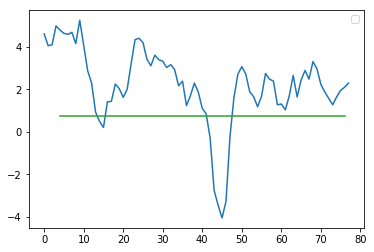

In [31]:
# Visualize results
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# shift train predictions for plotting 
train_predict_plot = np.empty_like(macro)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# also shift test pred
test_predict_plot = np.empty_like(macro)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(macro)-1, :] = test_predict

# let's plot our base model!
plt.plot(macro)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.legend()
plt.show()